<a href="https://colab.research.google.com/github/zibro011/DataScience-FinalProject/blob/main/Team2d6FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INET 4061 Final Project** <br>
**Team 2d6** <br>
**December 12, 2021** <br>

#Overview
This project explores the correlation between different song attributes and the song's genre. Using a variety of information about a given song, the goal of this project is to develop a model that most accurately identifies a song's genre. We do so using 5 different feature selection techniques and 3 different classification models. The feature selection techniques include: Correlation Heatmap, KMeans Clustering, Agglomerative Clustering, Feature Importance Using Random Forests, and Stepwise Regression. The classification models include: Random Forest Classifier, K Nearest Neighbors(KNN), and Multinomial Logistic Regression. All the work in this notebook was completed using prior knowledge or previous labs submitted during the semester unless otherwise noted.

#Download Data
The was collected by entering all songs included in playlists that Adelaide followed on Spotify onto this website: http://organizeyourmusic.playlistmachinery.com/. The website provided information for each song including song title, artist, top genre, date added, beats per minute(bpm), energy(nrgy), danceability(dnce), loudness(dB), liveness(live), valence(val), duration(dur), acousticness(acous), speechiness(spch), and popularity(pop). For the purposes of our project, we ommitted the title, artist, and date added variables, and our target variable was top genre.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
#upload file
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify (1).csv


In [ ]:
#read file
import io
df = pd.read_csv(io.BytesIO(uploaded['spotify.csv']))

#EDA

##Initial Exploration

In [ ]:
#see first 5 rows
df.head()

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Colder Weather,Zac Brown Band,contemporary country,2010.0,2018‑10‑10,136.0,38.0,67.0,-7.0,12.0,20.0,274.0,46.0,3.0,69.0
1,Bruised Orange (Chain of Sorrow),Justin Vernon,eau claire indie,2010.0,2018‑02‑21,51.0,42.0,17.0,-9.0,6.0,8.0,242.0,99.0,6.0,47.0
2,Static Waves,Andrew Belle,acoustic pop,2010.0,2016‑12‑02,144.0,53.0,62.0,-9.0,9.0,34.0,221.0,6.0,3.0,39.0
3,Business as Usual,Coma Cinema,anti-folk,2011.0,2021‑09‑29,129.0,59.0,63.0,-6.0,17.0,29.0,190.0,17.0,3.0,31.0
4,Long Burn The Fire,Beastie Boys,alternative rock,2011.0,2021‑09‑30,83.0,82.0,61.0,-6.0,38.0,40.0,214.0,20.0,26.0,30.0


In [ ]:
#see last 5 rows
df.tail()

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1019,Having No Head,The 1975,modern alternative rock,2020.0,2020‑05‑21,118.0,59.0,45.0,-14.0,8.0,3.0,365.0,38.0,8.0,42.0
1020,What Should I Say,The 1975,modern alternative rock,2020.0,2020‑05‑21,105.0,66.0,68.0,-9.0,10.0,14.0,246.0,9.0,5.0,52.0
1021,Bagsy Not In Net,The 1975,modern alternative rock,2020.0,2020‑05‑21,132.0,53.0,32.0,-10.0,11.0,33.0,147.0,13.0,3.0,44.0
1022,Dinner,Kacy Hill,alternative r&b,2020.0,2019‑06‑17,111.0,63.0,79.0,-8.0,11.0,27.0,155.0,80.0,6.0,38.0
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#see how many rows and columns are in the dataset
df.shape

(1024, 15)

In [ ]:
#see how many unique values there are for each variable
df.nunique()

title        651
artist       269
top genre    118
year         329
added         89
bpm          442
nrgy         413
dnce         402
dB           341
live         388
val          412
dur          544
acous        417
spch         365
pop          397
dtype: int64

In [ ]:
#get dataset attributes
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,2017.359258,116.619234,51.712319,57.520712,-8.554699,17.300330,39.847811,227.212589,38.051196,8.051057,55.915255
std,2.613059,24.184046,20.291443,14.900369,3.077937,14.588375,19.863098,53.888884,28.441783,7.421221,14.193772
min,2010.000000,47.000000,1.000000,8.000000,-25.000000,3.000000,3.000000,43.000000,0.000000,2.000000,0.000000
25%,2016.000000,105.000000,38.595402,51.250000,-9.539186,10.000000,28.000000,200.000000,9.000000,4.000000,51.000000
50%,2017.440850,114.996786,48.000000,59.300484,-8.820971,12.082518,39.645797,233.511890,41.000000,6.652089,56.613248
75%,2019.179077,125.000000,66.000000,63.000000,-7.000000,16.000000,48.000000,242.000000,53.000000,6.901108,62.000000
max,2022.496635,210.000000,99.000000,96.000000,-2.000000,98.000000,97.000000,591.000000,99.000000,54.000000,93.000000


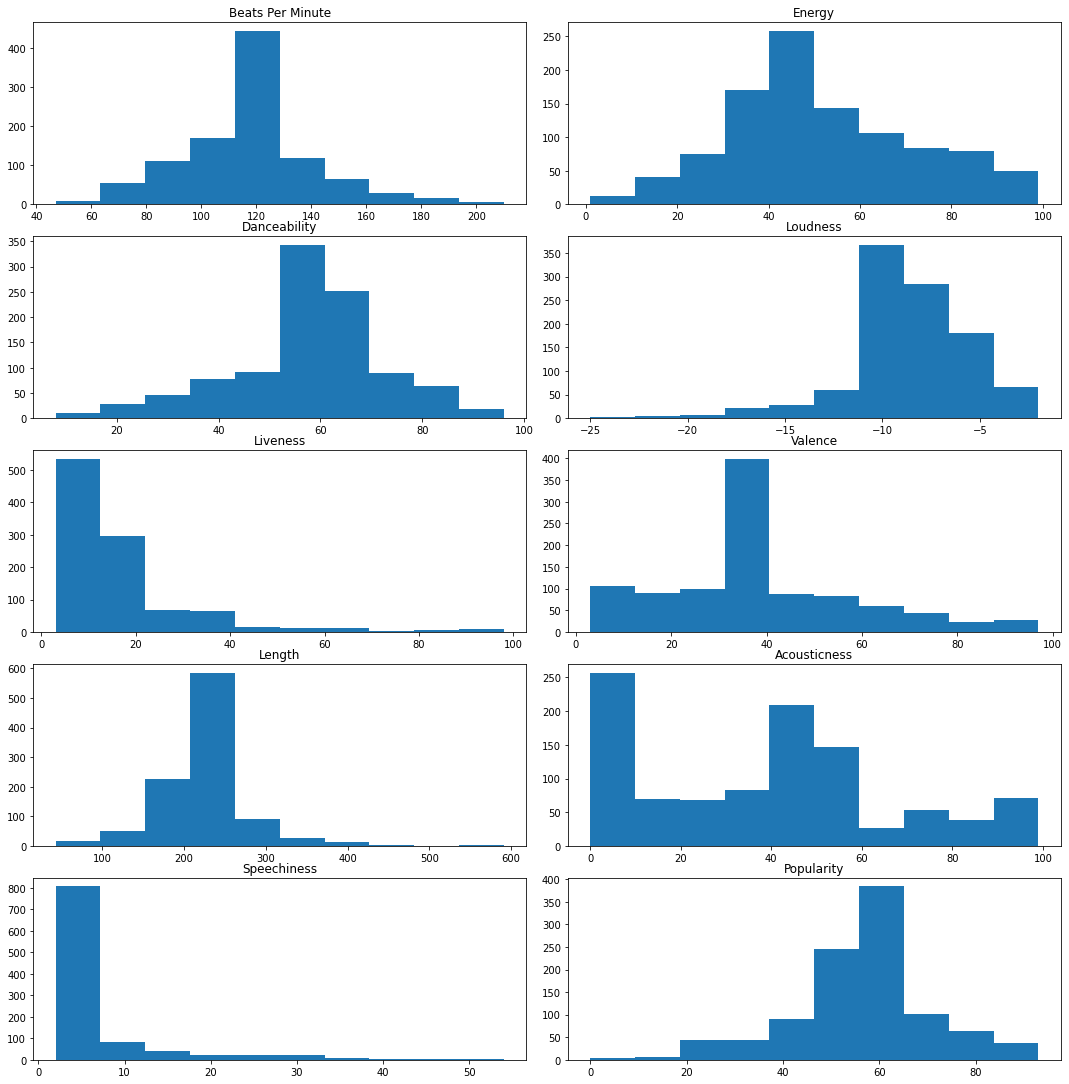

In [ ]:
#plot histograms of each feature
fig, axs = plt.subplots(5,2,figsize=(15,15))
fig.tight_layout()
axs[0, 0].hist(df['bpm'],bins=10) #original data
axs[0, 0].set_title('Beats Per Minute')
axs[0, 1].hist(df['nrgy'],bins=10) 
axs[0, 1].set_title('Energy')
axs[1, 0].hist(df['dnce'],bins=10) 
axs[1, 0].set_title('Danceability')
axs[1, 1].hist(df['dB'],bins=10) 
axs[1, 1].set_title('Loudness')

axs[2, 0].hist(df['live'],bins=10) 
axs[2, 0].set_title('Liveness')

axs[2, 1].hist(df['val'],bins=10) 
axs[2, 1].set_title('Valence')

axs[3, 0].hist(df['dur'],bins=10)
axs[3, 0].set_title('Length')

axs[3, 1].hist(df['acous'],bins=10)
axs[3, 1].set_title('Acousticness')

axs[4, 0].hist(df['spch'],bins=10) 
axs[4, 0].set_title('Speechiness')

axs[4, 1].hist(df['pop'],bins=10) 
axs[4, 1].set_title('Popularity')
plt.show()

##Cleaning Data
Here we drop duplicate rows, drop rows containing null values, reduce the number of genres listed under the 'top genre' attribute, convert genres to corresponding integers, create testing and training data, and scale our data. 

In [ ]:
#drop duplicate rows
df.drop_duplicates()
df.shape

(1024, 15)

In [ ]:
#drop added because it is irrelevant
df = df.drop(columns=['added'])

In [ ]:
#drop any rows that contain a null value in any column
df= df.dropna(how = 'any', axis = 0)
df.shape

(995, 14)

In [ ]:
#make less genres (went from 118 to 21)
df['top genre'] = df['top genre'].replace({'viral pop':'pop', 'contemporary country':'country', 'eau claire indie':'indie', 'acoustic pop':'acoustic', 'alternative rock':'rock', 'modern alternative rock' :'rock', 'anti-folk' : 'emo/punk', 'art pop': 'pop', 'indie pop': 'indie', 'atl hip hop': 'hip hop', 'baroque pop': 'pop', 'alternative r&b' : 'r&b', 'folk-pop': 'folk', 'east coast reggae':'reggae', 'boy band': 'pop', 'british soul' : 'soul', 'indie folk' : 'folk', 'conscious hip hop' : 'hip hop', 'modern rock' : 'rock', 'indie garage rock': 'rock', 'folk-pop': 'folk', 'acoustic rock' : 'acoustic', 'dance pop':'pop', 'teen pop': 'pop', 'brooklyn indie' : 'indie', 'gainesville indie':'indie', 'indie poptimism':'indie', 'metropopolis':'pop', 'german pop': 'pop', 'alternative emo':'emo/punk', 'ambient folk':'ambient', 'irish singer-songwriter': 'singer-songwriter', 'ambient worship':'ambient', 'trap soul':'soul', 'canadian pop': 'pop', 'belfast indie':'indie', 'pop soul':'soul', 'indie anthem-folk':'folk', 'australian pop':'pop', 'australian alternative pop':'pop', 'comedy rap':'rap', 'la pop':'pop', 'dfw rap':'rap', 'french indie pop':'pop', 'antiviral pop':'pop', 'chicago rap':'rap', 'electropop':'pop', 'taiwan indie':'indie', 'vapor pop':'pop', 'adult standards': 'classical', 'aesthetic rap':'rap', 'alabama rap':'rap','alaska indie':'indie','alberta hip hop': 'hip hop', 'alternative dance': 'house', 'alternative pop rock': 'rock', 'alt z': 'alternative', 'australian hip hop':'hip hop', 'bedroom pop':'pop', 'bedroom soul':'soul', 'cali rap': 'rap', 'canadian hip hop': 'hip hop', 'trap beats': 'hip hop', 'swedish singer-songwriter': 'singer-songwriter', 'pop rap': 'rap', 'philly indie': 'indie', 'ontario indie': 'indie', 'ohio hip hop': 'hip hop', 'north carolina hip hop': 'hip hop', 'nigerian pop': 'pop', 'neo-classical': 'classical', 'modern folk rock': 'folk', 'miami hip hop': 'hip hop', 'meme rap': 'rap', 'modern indie pop': 'indie', 'melodic rap': 'rap', 'lo-fi rap':'rap', 'k-pop':'pop', 'irish pop': 'pop', 'indonesian singer-songwriter': 'singer-songwriter', 'indie soul': 'soul', 'indie rock': 'rock', 'indie r&b': 'r&b', 'indie hip hop': 'hip hop', 'gauze pop': 'pop', 'emo rap': 'emo/punk', 'dmv rap': 'rap', 'deep underground hip hop': 'hip hop', 'colombian pop': 'pop', 'cincinnati indie': 'indie', 'chill r&b': 'r&b', 'canadian indie': 'indie', 'canadian contemporary r&b': 'r&b', 'australian r&b': 'r&b', 'indie rockism': 'indie', 'escape room': 'pop', 'deep groove house': 'house', 'complextro': 'house', 'deep new americana': 'other', 'austin americana' : 'other', 'afro dancehall': 'afro', 'afrofuturism': 'afro', 'bachata': 'latin', 'musica nicaraguense':'latin', 'banjo':'folk', 'brooklyn drill': 'hip hop', 'aussietronica': 'other', 'dream smp': 'other', 'chillwave':'indie', 'ccm': 'other', 'bubblegrunge': 'rock', 'australian psych': 'rock', 'emo': 'emo/punk', 'punk': 'emo/punk' })


In [ ]:
#Calculating the number of songs of each genre
print(type(df['top genre']))
popular_genre=df.groupby('top genre').size().unique
print(popular_genre)
genre_list=df['top genre'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of top genre
a cappella            12
acoustic               9
afro                   4
alternative            6
ambient               19
classical              3
country                5
emo/punk              17
folk                  50
hip hop               80
house                  4
indie                 96
latin                  5
other                  9
pop                  315
r&b                   45
rap                   32
reggae                 3
rock                 257
singer-songwriter     12
soul                  12
dtype: int64>


In [ ]:
#make each genre a corresponding numerical value
df['top genre'] = df['top genre'].replace({'a cappella':0, 'acoustic':1, 'afro': 2, 'alternative': 3, 'ambient': 4,'classical':5, 'country':6, 'emo/punk':7, 'folk': 8, 'hip hop': 9, 'house':10, 'indie':11, 'latin':12, 'other':13, 'pop':14, 'r&b':15, 'rap':16, 'reggae':17, 'rock':18, 'rock':19, 'singer-songwriter':20, 'soul':21, 'worship':4})

In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train = df.drop(columns=['artist', 'title'])
df_scaled = scaler.fit_transform(df_train)

In [ ]:
from sklearn.model_selection import train_test_split
# Creating a test and training dataset
X = df.drop(columns=['artist', 'title', 'top genre'])
y = df['top genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#Feature Selection
In order to best predict a song's genre, we determined which features are most important in doing so. We made this decision using a correlation heatmap, KMeans clustering, agglomerative clustering, feature importance, and stepwise regression. Overall, we found the following features to be most important: loudness(dB) and liveness. 

##Correlation Heatmap
The results of this analysis suggest that the most important features in determining a song's genre are: loudness (dB) and liveness while the least valuable features in terms of predicting a song's genre are acousticness and popularity. This section was completed using information from https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e.

In [ ]:
import seaborn as sns
correlation=df.corr(method='spearman')
# heatmap of the correlation 
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

NameError: ignored

The heatmap above shows high correlations between loudness(dB) and top genre and liveness and top genre because those values are closest to 1.

In [ ]:
heatmapX = df.drop(columns=['artist', 'title', 'top genre','year', 'bpm','nrgy','dnce','val','dur','acous','spch','pop'])
heatmapy = df['top genre']
heatX_train, heatX_test, heaty_train, heaty_test = train_test_split(heatmapX, heatmapy, test_size=0.30)

##KMeans Clustering
The results of this analysis suggest that the most important features in determining a song's genre are: beats per minute, danceability, liveness, loudness, length, speechiness, and popularity. This section was completed using information from https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#h2_14.

In [ ]:
from sklearn.cluster import KMeans
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.axvline(x=7, color = 'r') 
plt.axvline(x=12, color = 'r') 
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Using the elbow-method in the plot above, we would say the ideal number of clusters could be anywhere between 7 and 12 (marked with red lines on the plot). 

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [7, 8, 9, 10, 11, 12]

for n_clusters in range_n_clusters:
    # Create a subplot to print one silhouette plot per "line"
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The silhouette analysis above suggests that 11 clusters would be ideal because all the silhouettes have a coefficient equal to or above the average silhouette score, and the silhouettes are roughly close in size in comparison to the analyses using different amounts of clusters.

In [ ]:
kmeans = KMeans(n_clusters = 11, init='k-means++', random_state = 123)
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)

In [ ]:
frame = pd.DataFrame(df_scaled)
frame['cluster'] = pred


#create new dataframe to use in boxplots
KMean = df.copy()
KMean['KCluster'] = frame['cluster']

frame['cluster'].value_counts()

In [ ]:
#output resulting clusters
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(KMean.KCluster, KMean.bpm).set(title = 'Beats Per Minute')
plt.show()
sns.boxplot(KMean.KCluster, KMean.nrgy).set(title = 'Energy')
plt.show()
sns.boxplot(KMean.KCluster, KMean.dnce).set(title = 'Danceability')
plt.show()
sns.boxplot(KMean.KCluster, KMean.dB).set(title = 'Loudness')
plt.show()
sns.boxplot(KMean.KCluster, KMean.live).set(title = 'Liveness')
plt.show()
sns.boxplot(KMean.KCluster, KMean.val).set(title = 'Valence')
plt.show()
sns.boxplot(KMean.KCluster, KMean.dur).set(title = 'Duration')
plt.show()
sns.boxplot(KMean.KCluster, KMean.acous).set(title = 'Accousticness')
plt.show()
sns.boxplot(KMean.KCluster, KMean.spch).set(title = 'Speechiness')
plt.show()

In the boxplots above, we can see that clusters 3 and 4 have very high variance in every variable, so we will disregard those clusters in our feature analysis. Most of the variable plots are fairly similar in variance, but acousticness, valence, and energy have the highest variance overall. When using clustering to determine feature importance, we want the features with the least variance, so we would drop acousticness, valence, and energy using this clustering analysis.

In [ ]:
KMeansX = df.drop(columns=['artist', 'title', 'top genre','nrgy','val','acous'])
KMeansy = df['top genre']
KMeansX_train, KMeansX_test, KMeansy_train, KMeansy_test = train_test_split(KMeansX, KMeansy, test_size=0.30)

##Agglomerative Clustering
The results of this analysis suggest that the most important features in determining a song's genre are: loudness, duration, and energy.  This section was performed using information from https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/.

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.show()
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram with Horizontal Line(K)")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=18, color = 'black')
plt.show()

Using the dendogram method above, we decide on 12 clusters because the horizontal line we drew crosses 12 vertical lines.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_scaled)
b = cluster.fit_predict(df_scaled)

frame2 = pd.DataFrame(df_scaled)
frame2['cluster'] = b

#create new dataframe to use in boxplots
Agg = df.copy()
Agg['HCluster'] = b

frame2['cluster'].value_counts()


In [ ]:
print(Agg.dur)

In [ ]:
#output resulting clusters
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(Agg.HCluster, Agg.bpm).set(title = 'Beats Per Minute')
plt.show()
sns.boxplot(Agg.HCluster, Agg.nrgy).set(title = 'Energy')
plt.show()
sns.boxplot(Agg.HCluster, Agg.dnce).set(title = 'Danceability')
plt.show()
sns.boxplot(Agg.HCluster, Agg.dB).set(title = 'Loudness')
plt.show()
sns.boxplot(Agg.HCluster, Agg.live).set(title = 'Liveness')
plt.show()
sns.boxplot(Agg.HCluster, Agg.val).set(title = 'Valence')
plt.show()
sns.boxplot(Agg.HCluster, Agg.dur).set(title = 'Duration')
plt.show()
sns.boxplot(Agg.HCluster, Agg.acous).set(title = 'Accousticness')
plt.show()
sns.boxplot(Agg.HCluster, Agg.spch).set(title = 'Speechiness')
plt.show()

When using clustering to determine feature importance, we want the features with the least variance. The boxplots above suggest that loudness, duration, and energy have the least variance because the boxplots are roughly the smallest, so we would choose these features as most important.

In [ ]:
aggX = df.drop(columns=['artist', 'title', 'top genre','year', 'bpm', 'live', 'dnce','val','acous','spch','pop'])
aggy = df['top genre']
aggX_train, aggX_test, aggy_train, aggy_test = train_test_split(aggX, aggy, test_size=0.30)

##Feature Importance Using Random Forests
The results of this analysis suggest that the most important features in determining a song's genre are: acousticness, popularity, year, and danceability.

This analysis was completed using information from https://vitalflux.com/feature-importance-random-forest-classifier-python/.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

In [ ]:
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

In [ ]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Using Random Forest Feature Importance, we can see that the most important features are acousticness, popularity, year, and danceability.

In [ ]:
rfX = df.drop(columns=['artist', 'title', 'top genre','bpm', 'dB', 'live', 'nrgy','val','dur','spch'])
rfy = df['top genre']
rfX_train, rfX_test, rfy_train, rfy_test = train_test_split(rfX, rfy, test_size=0.30)

##Stepwise Regression
The results of this analysis suggest that the most important features in determining a song's genre are: liveness and accousticness. 

In [ ]:
import statsmodels.api as sm
#perform stepwise selection on variables
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
#            best_feature = new_pval.argmin()
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

The output following 'resulting features:' tells us that stepwise regression deemed liveness and acousticness to be the most important features in determining a song's genre.

In [ ]:
sX = df.drop(columns=['artist', 'title', 'top genre','bpm', 'dB', 'nrgy','val','dur','spch','pop','year','dnce'])
sy = df['top genre']
sX_train, sX_test, sy_train, sy_test = train_test_split(sX, sy, test_size=0.30)

#Models
Now, we will put our selected features to work in three different classification models: Random Forest, K Nearest Neighbors(KNN), and Multinomial Logistic Regression. We will train and make predictions on each of the three models using the selected features from each of the five feature selection techniques. Then, we will plot their accuracy to determine which feature selection techniques and which models were most successful in predicting a song's genre.

In [ ]:
name_array = ['Original', 'HeatMap', 'KMeans Clustering', 'Agglomerative Clustering', 'Feature Importance', 'Stepwise Regression']

##Random Forest Classifier
This section was completed using information from https://www.datacamp.com/community/tutorials/random-forests-classifier-python. The results of this section showed that using no feature selection was the most accurate when training this model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(n_estimators=100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
RFheatmap = RandomForestClassifier(n_estimators=100)
RFheatmap.fit(heatX_train,heaty_train)
RFKM = RandomForestClassifier(n_estimators=100)
RFKM.fit(KMeansX_train,KMeansy_train)
RFagg = RandomForestClassifier(n_estimators=100)
RFagg.fit(aggX_train,aggy_train)
RFrf = RandomForestClassifier(n_estimators=100)
RFrf.fit(rfX_train,rfy_train)
RFs = RandomForestClassifier(n_estimators=100)
RFs.fit(sX_train,sy_train)

RandomForestClassifier()

In [ ]:
#make predicitions using model
from sklearn import metrics
RFrfc_pred = rfc.predict(X_test)
RF_acc = metrics.accuracy_score(y_test, RFrfc_pred)
print("Original Accuracy:",RF_acc)
RFheat_pred = RFheatmap.predict(heatX_test)
RFheat_acc = metrics.accuracy_score(heaty_test, RFheat_pred)
print("HeatMap Accuracy:",RFheat_acc)
RFKM_pred = RFKM.predict(KMeansX_test)
RFKM_acc = metrics.accuracy_score(KMeansy_test, RFKM_pred)
print("KMeans Clustering Accuracy:",RFKM_acc)
RFagg_pred = RFagg.predict(aggX_test)
RFagg_acc = metrics.accuracy_score(aggy_test, RFagg_pred)
print("Aggregate Clustering Accuracy:",RFagg_acc)
RFrf_pred = RFrf.predict(rfX_test)
RFrf_acc = metrics.accuracy_score(rfy_test, RFrf_pred)
print("Random Forest Accuracy:",RFrf_acc)
RFs_pred = RFs.predict(sX_test)
RFs_acc = metrics.accuracy_score(sy_test, RFs_pred)
print("Stepwise Regression Accuracy:",RFs_acc)

Original Accuracy: 0.4983277591973244
HeatMap Accuracy: 0.33444816053511706
KMeans Clustering Accuracy: 0.47157190635451507
Aggregate Clustering Accuracy: 0.4013377926421405
Random Forest Accuracy: 0.42474916387959866
Stepwise Regression Accuracy: 0.39464882943143814


In [ ]:
RFacc = [RF_acc,RFheat_acc,RFKM_acc,RFagg_acc,RFrf_acc,RFs_acc]
RFacc = pd.DataFrame(RFacc)
RFacc.insert(0,'Selection Technique', name_array, True)
RFacc.head()

,Selection Technique,0
0,Original,0.498328
1,HeatMap,0.334448
2,KMeans Clustering,0.471572
3,Agglomerative Clustering,0.401338
4,Feature Importance,0.424749


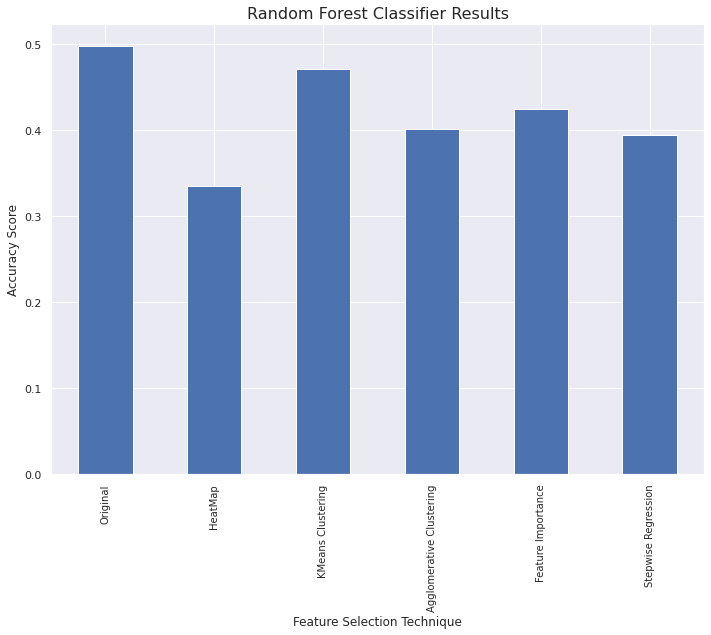

In [ ]:
RFaccplot = RFacc.plot(kind="bar")
plt.title("Random Forest Classifier Results",fontsize=16)
plt.xlabel("Feature Selection Technique",fontsize=12)
plt.ylabel("Accuracy Score",fontsize=12)
plt.xticks([0,1,2,3,4,5], name_array, fontsize=10)
RFaccplot.get_legend().remove()

##K Nearest Neighbors (KNN)
The results of this section showed that using no feature selection was the most accurate when training this model.

In [ ]:
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))
k = 5  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=5 is",metrics.accuracy_score(y_test, Pred_y))
k = 6  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=6 is",metrics.accuracy_score(y_test, Pred_y))
k = 7  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=7 is",metrics.accuracy_score(y_test, Pred_y))
k = 8  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=8 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.36454849498327757
Accuracy of model at K=5 is 0.34448160535117056
Accuracy of model at K=6 is 0.391304347826087
Accuracy of model at K=7 is 0.3979933110367893
Accuracy of model at K=8 is 0.38461538461538464


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train,y_train)
knn_heatmap = KNeighborsClassifier(n_neighbors=7)
knn_heatmap.fit(heatX_train,heaty_train)
knn_KM = KNeighborsClassifier(n_neighbors=7)
knn_KM.fit(KMeansX_train,KMeansy_train)
knn_agg = KNeighborsClassifier(n_neighbors=7)
knn_agg.fit(aggX_train,aggy_train)
knn_rf = KNeighborsClassifier(n_neighbors=7)
knn_rf.fit(rfX_train,rfy_train)
knn_s = KNeighborsClassifier(n_neighbors=7)
knn_s.fit(sX_train,sy_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#make predicitions using model
knn_clf_pred = knn_clf.predict(X_test)
knn_acc = metrics.accuracy_score(y_test, knn_clf_pred)
print("Original Accuracy:",knn_acc)
knn_heatmap_pred = knn_heatmap.predict(heatX_test)
knn_heatmap_acc = metrics.accuracy_score(heaty_test, knn_heatmap_pred)
print("HeatMap Accuracy:",knn_heatmap_acc)
knn_KM_pred = knn_KM.predict(KMeansX_test)
knn_KM_acc = metrics.accuracy_score(KMeansy_test, knn_KM_pred)
print("KMeans Clustering Accuracy:",knn_KM_acc)
knn_agg_pred = knn_agg.predict(aggX_test)
knn_agg_acc = metrics.accuracy_score(aggy_test, knn_agg_pred)
print("Aggregate Clustering Accuracy:",knn_agg_acc)
knn_rf_pred = knn_rf.predict(rfX_test)
knn_rf_acc = metrics.accuracy_score(rfy_test, knn_rf_pred)
print("Random Forest Accuracy:",knn_rf_acc)
knn_s_pred = knn_s.predict(sX_test)
knn_s_acc = metrics.accuracy_score(sy_test, knn_s_pred)
print("Stepwise Regression Accuracy:",knn_s_acc)

Original Accuracy: 0.3979933110367893
HeatMap Accuracy: 0.34448160535117056
KMeans Clustering Accuracy: 0.38461538461538464
Aggregate Clustering Accuracy: 0.34448160535117056
Random Forest Accuracy: 0.3745819397993311
Stepwise Regression Accuracy: 0.3712374581939799


In [ ]:
KNNacc = [knn_acc,knn_heatmap_acc,knn_KM_acc,knn_agg_acc,knn_rf_acc,knn_s_acc]
KNNacc = pd.DataFrame(KNNacc)
KNNacc.insert(0,'Selection Technique', name_array, True)
KNNacc.head()

,Selection Technique,0
0,Original,0.397993
1,HeatMap,0.344482
2,KMeans Clustering,0.384615
3,Agglomerative Clustering,0.344482
4,Feature Importance,0.374582


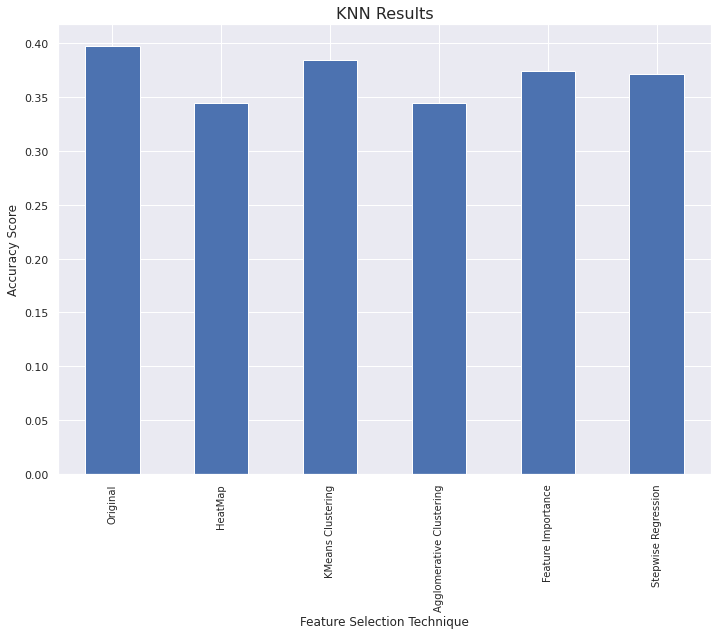

In [ ]:
KNNaccplot = KNNacc.plot(kind="bar")
plt.title("KNN Results",fontsize=16)
plt.xlabel("Feature Selection Technique",fontsize=12)
plt.ylabel("Accuracy Score",fontsize=12)
plt.xticks([0,1,2,3,4,5], name_array, fontsize=10)
KNNaccplot.get_legend().remove()

##Multinomial Logistic Regression
The results of this section showed that using no feature selection or using heatmap correlation were equally the most accurate when training this model.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_clf.fit(X_train,y_train)
lr_heatmap = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_heatmap.fit(heatX_train,heaty_train)
lr_KM = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_KM.fit(KMeansX_train,KMeansy_train)
lr_agg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_agg.fit(aggX_train,aggy_train)
lr_rf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_rf.fit(rfX_train,rfy_train)
lr_s = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_s.fit(sX_train,sy_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(multi_class='multinomial')

In [ ]:
#make predicitions using model
lr_clf_pred = lr_clf.predict(X_test)
lr_clf_acc=metrics.accuracy_score(y_test, lr_clf_pred)
print("Original Accuracy:",lr_clf_acc)
lr_heat_pred = lr_heatmap.predict(heatX_test)
lr_heat_acc=metrics.accuracy_score(heaty_test, lr_heat_pred)
print("HeatMap Accuracy:",lr_heat_acc)
lr_KM_pred = knn_KM.predict(KMeansX_test)
lr_KM_acc=metrics.accuracy_score(KMeansy_test, lr_KM_pred)
print("KMeans Clustering Accuracy:",lr_KM_acc)
lr_agg_pred = lr_agg.predict(aggX_test)
lr_agg_acc=metrics.accuracy_score(aggy_test, lr_agg_pred)
print("Aggregate Clustering Accuracy:",lr_agg_acc)
lr_rf_pred = lr_rf.predict(rfX_test)
lr_rf_acc=metrics.accuracy_score(rfy_test, lr_rf_pred)
print("Random Forest Accuracy:",lr_rf_acc)
lr_s_pred = lr_s.predict(sX_test)
lr_s_acc=metrics.accuracy_score(sy_test, lr_s_pred)
print("Stepwise Regression Accuracy:",lr_s_acc)

Original Accuracy: 0.38127090301003347
HeatMap Accuracy: 0.3511705685618729
KMeans Clustering Accuracy: 0.38461538461538464
Aggregate Clustering Accuracy: 0.3177257525083612
Random Forest Accuracy: 0.34448160535117056
Stepwise Regression Accuracy: 0.32441471571906355


In [ ]:
lracc = [lr_clf_acc,lr_clf_acc,lr_KM_acc,lr_agg_acc,lr_rf_acc,lr_s_acc]
lracc = pd.DataFrame(lracc)
lracc.insert(0,'Selection Technique', name_array, True)
lracc.head()

,Selection Technique,0
0,Original,0.381271
1,HeatMap,0.381271
2,KMeans Clustering,0.384615
3,Agglomerative Clustering,0.317726
4,Feature Importance,0.344482


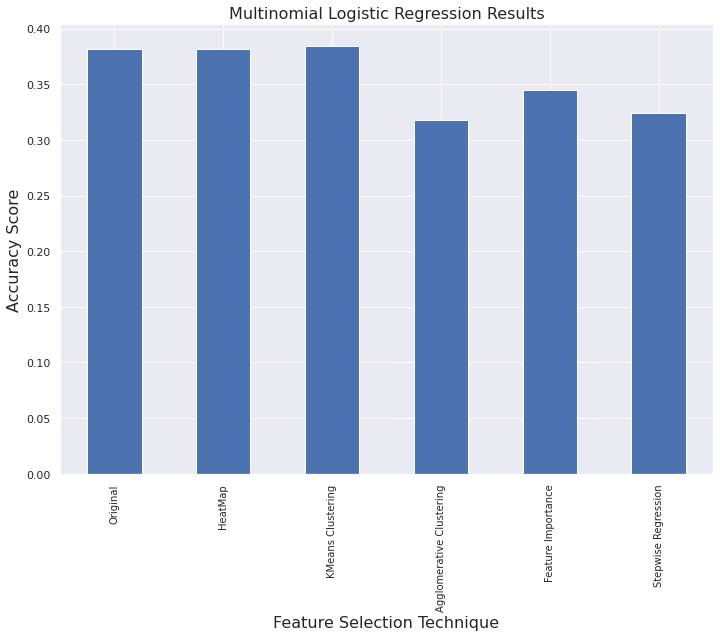

In [ ]:
lracc = lracc.plot(kind="bar")
plt.title("Multinomial Logistic Regression Results",fontsize=16)
plt.xlabel("Feature Selection Technique",fontsize=16)
plt.ylabel("Accuracy Score",fontsize=16)
plt.xticks([0,1,2,3,4,5], name_array, fontsize=10)
lracc.get_legend().remove()

#Conclusions
The most accurate model is the Random Forest Classifier Model using the original, unedited data set. The lowest overall accuracy came from the Multinomial Logistic Regression Model using Agglomerative Clustering for feature selection. In terms of feature selection alone, using no feature selection and sticking with the original data was most accurate. In terms of the most accurate model (independent of feature selection), the Random Forest Classifier was most accurate. This project is a good example that sometimes feature selection is unneccesary. In our case, our number of features were already low, so our model performed best when all the features were included. However, even the Random Classifer Model only had an accuracy of about 50%, meaning this model would not be a reliable predictor of a song's genre. In the future, it would be best to use a much larger dataset with many more features in order to improve the model's accuracy. Specific accuracies for each model with each feature selection technique is displayed below.

In [ ]:
all_acc = pd.merge(pd.merge(RFacc,KNNacc,on='Selection Technique'),lracc,on='Selection Technique')
all_acc.columns=['Selection Technique', 'Random Forest', 'KNN', 'Multinomial Logistic Regression']
all_acc.head()

,Selection Technique,Random Forest,KNN,Multinomial Logistic Regression
0,Original,0.501672,0.351171,0.391304
1,HeatMap,0.347826,0.257525,0.391304
2,KMeans Clustering,0.438127,0.321070,0.321070
3,Agglomerative Clustering,0.351171,0.277592,0.237458
4,Feature Importance,0.451505,0.351171,0.354515


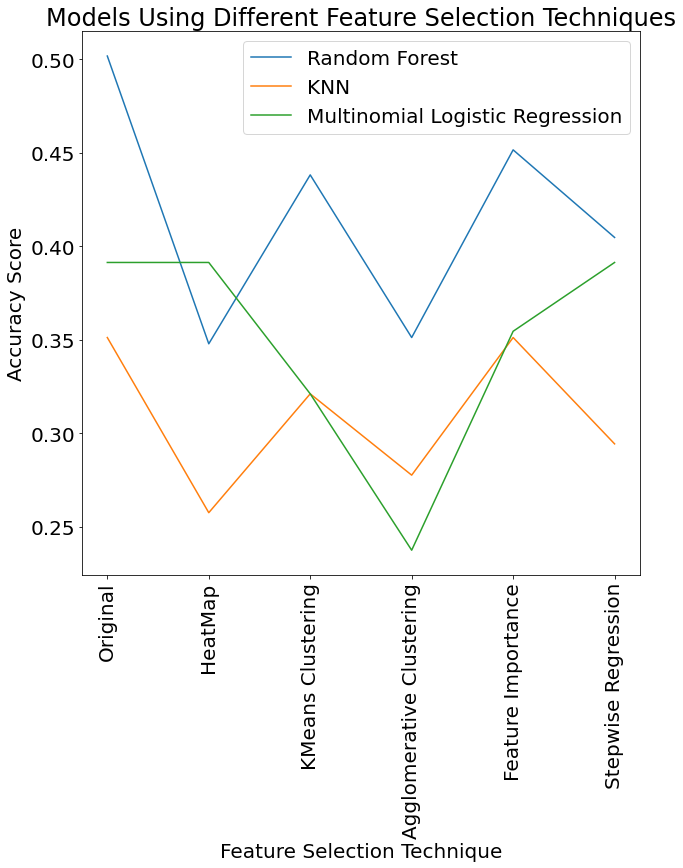

In [ ]:
lines = all_acc.plot.line(figsize=[10,10])
plt.title("Models Using Different Feature Selection Techniques")
plt.xticks([0,1,2,3,4,5], name_array)
plt.xticks(rotation = 90)
lines.set_xlabel("Feature Selection Technique")
lines.set_ylabel("Accuracy Score")
plt.show()